# 1.Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import association_rules,apriori
%matplotlib inline

# 2.Import Dataset

In [5]:
movie=pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# 3.Data Understanding | EDA

In [6]:
movie.shape

(10, 15)

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [8]:
movie.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [9]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

# 4.Data Preprocessing

In [11]:
movie.drop(['V1','V2','V3','V4','V5'],axis=1,inplace=True)

In [12]:
movie.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [13]:
movie.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

# Apriori

## support=0.1 and confidence=0.5

In [15]:
frequency=apriori(df=movie,min_support=0.1,use_colnames=True)
frequency

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [17]:
frequency['length']=frequency['itemsets'].apply(lambda x:len(x))
frequency

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [19]:
best_associates=association_rules(df=frequency,metric='lift',min_threshold=0.5)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


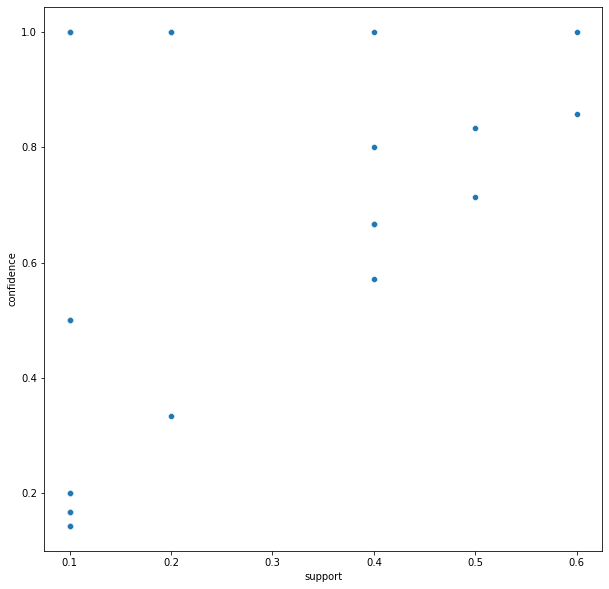

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=best_associates['support'],y=best_associates['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## support=0.1 and confidence=0.6

In [23]:
best_associates1=association_rules(df=frequency,metric='lift',min_threshold=0.6)
best_associates1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


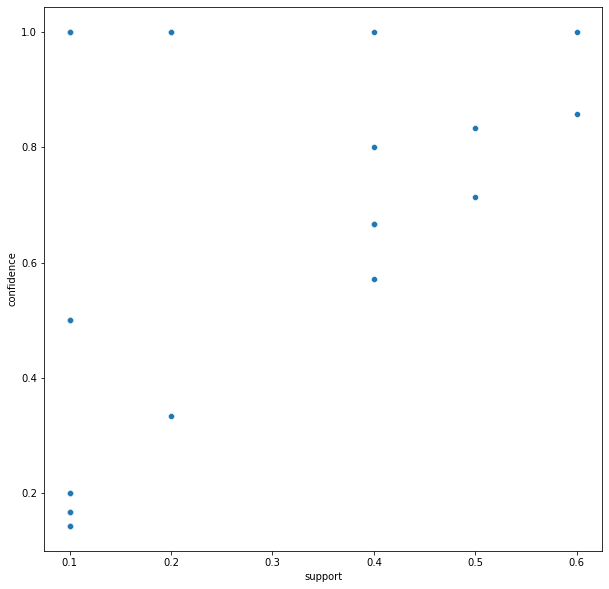

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=best_associates1['support'],y=best_associates1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## support=0.2 and confidence=0.5

In [26]:
frequency2=apriori(df=movie,min_support=0.2,use_colnames=True)
frequency2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [28]:
frequency2['lenght']=frequency2['itemsets'].apply(lambda x:len(x))
frequency2

,support,itemsets,lenght
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Gladiator, Sixth Sense)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [30]:
best_associates2=association_rules(df=frequency2,metric='lift',min_threshold=0.5)
best_associates2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


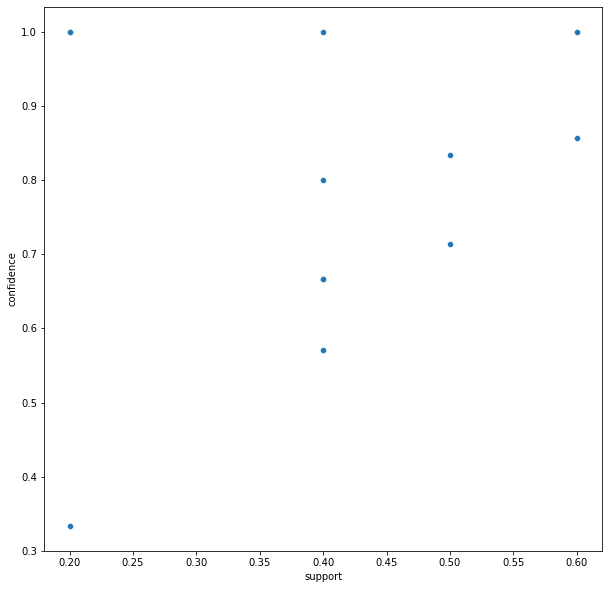

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=best_associates2['support'],y=best_associates2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## support=0.3 and confidence=0.5

In [32]:
frequency3=apriori(df=movie,min_support=0.3,use_colnames=True)
frequency3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [33]:
frequency3['lenght']=frequency3['itemsets'].apply(lambda x:len(x))
frequency3

,support,itemsets,lenght
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Gladiator, Sixth Sense)",2
4,0.4,"(Sixth Sense, Patriot)",2
5,0.6,"(Gladiator, Patriot)",2
6,0.4,"(Gladiator, Sixth Sense, Patriot)",3


In [34]:
best_associates3=association_rules(df=frequency3,metric='lift',min_threshold=0.5)
best_associates3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


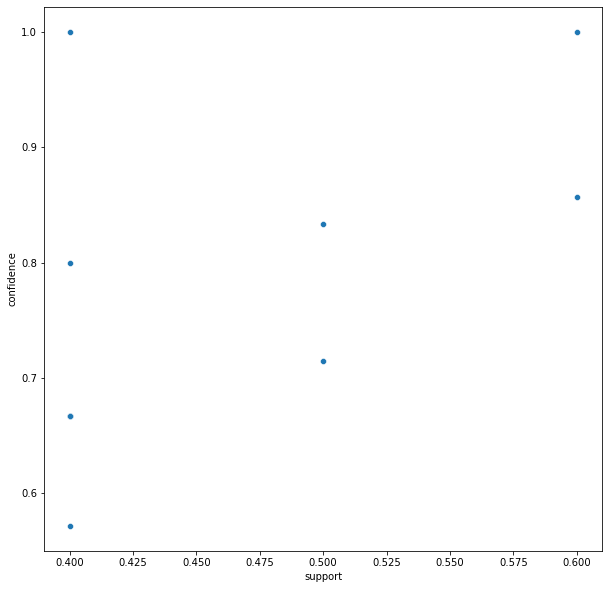

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=best_associates3['support'],y=best_associates3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## support=0.4 and confidence=0.5

In [36]:
frequency4=apriori(df=movie,min_support=0.4,use_colnames=True)
frequency4

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [37]:
frequency4['lenght']=frequency4['itemsets'].apply(lambda x:len(x))
frequency4

,support,itemsets,lenght
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Gladiator, Sixth Sense)",2
4,0.4,"(Sixth Sense, Patriot)",2
5,0.6,"(Gladiator, Patriot)",2
6,0.4,"(Gladiator, Sixth Sense, Patriot)",3


In [38]:
best_associates4=association_rules(df=frequency4,metric='lift',min_threshold=0.5)
best_associates4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


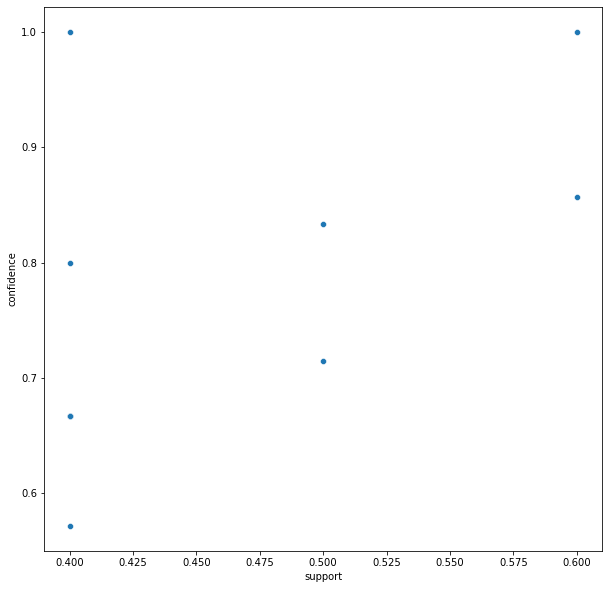

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=best_associates4['support'],y=best_associates4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## support=0.5 and confidence=0.5

In [40]:
frequency5=apriori(df=movie,min_support=0.5,use_colnames=True)
frequency5

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [41]:
frequency5['lenght']=frequency5['itemsets'].apply(lambda x:len(x))
frequency5

,support,itemsets,lenght
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Gladiator, Sixth Sense)",2
4,0.6,"(Gladiator, Patriot)",2


In [42]:
best_associates5=association_rules(df=frequency5,metric='lift',min_threshold=0.5)
best_associates5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


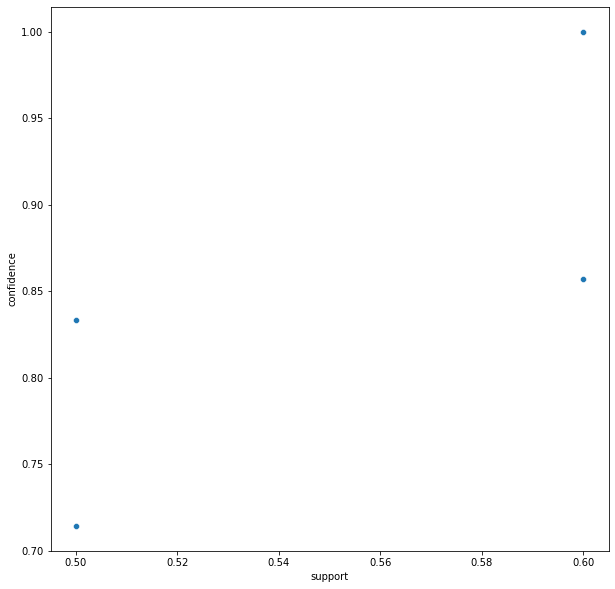

In [45]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=best_associates5['support'],y=best_associates5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## support=0.5 and confidence=0.6

In [44]:
best_associates6=association_rules(df=frequency5,metric='lift',min_threshold=0.6)
best_associates6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


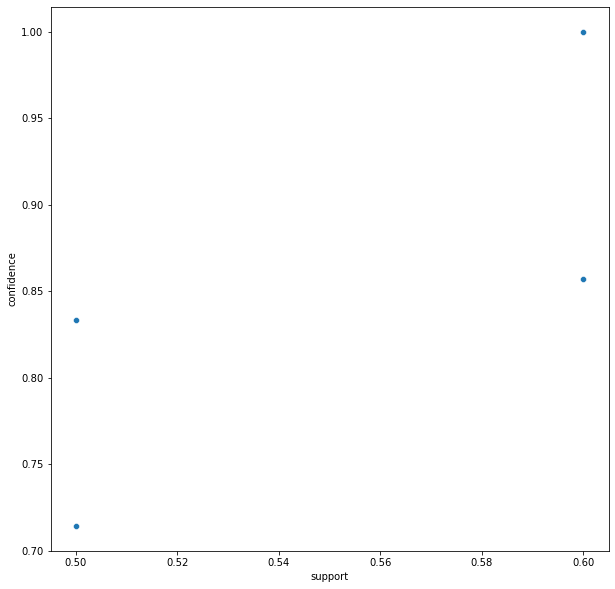

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=best_associates5['support'],y=best_associates5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## support=0.5 and confidence=0.7

In [51]:
best_associates7=association_rules(df=frequency5,metric='lift',min_threshold=0.6)
best_associates7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


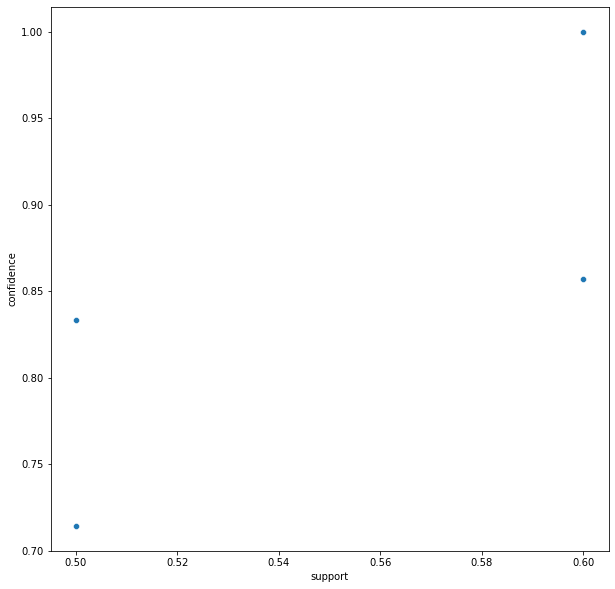

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=best_associates6['support'],y=best_associates6['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## support=0.5 and confidence=0.8

In [53]:
best_associates8=association_rules(df=frequency5,metric='lift',min_threshold=0.6)
best_associates8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


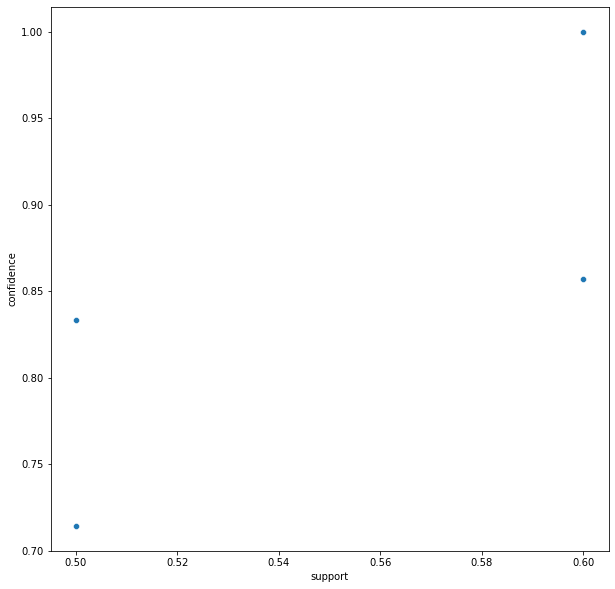

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=best_associates8['support'],y=best_associates8['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()